Bagged Decision Tree Classifier Implementation

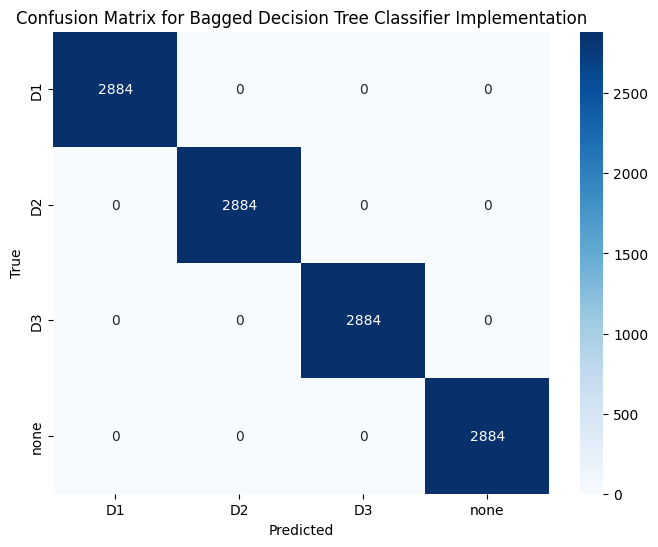

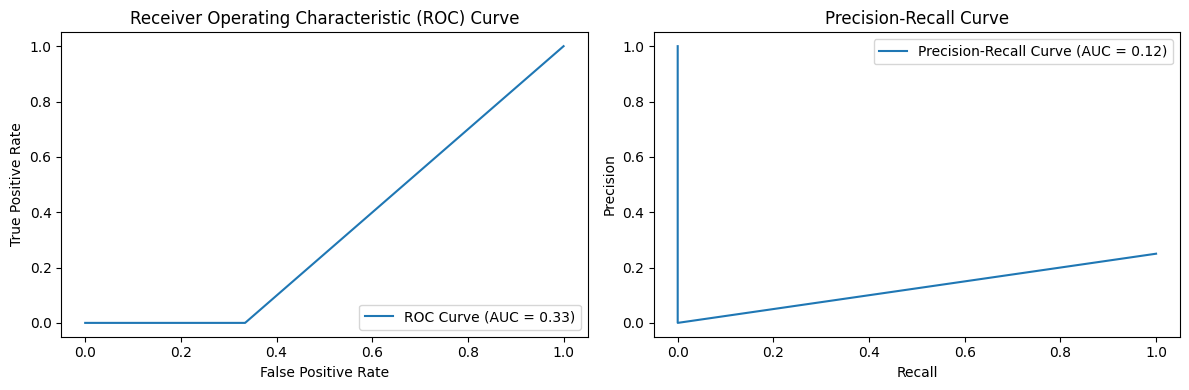

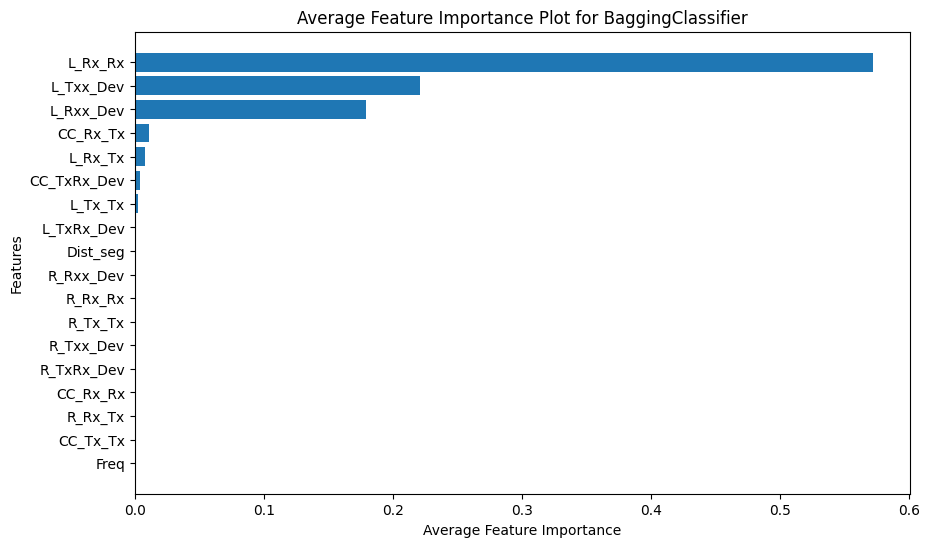

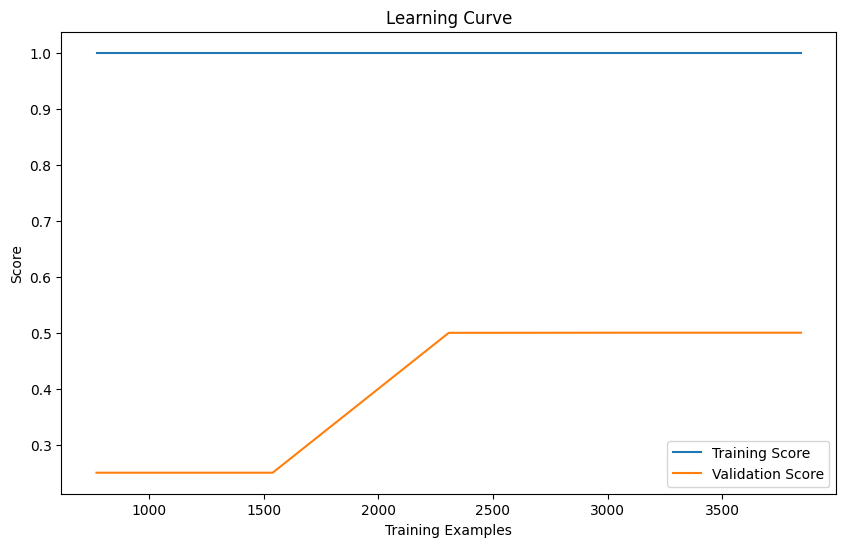

Validation Accuracy: 1.0


In [1]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import confusion_matrix  # Add this import statement
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve


# Import data from CSV 
file_path = 'alldata.csv'
training_data = pd.read_csv(file_path)

# Global variables
global predictors, response , predictor_names

# Function to train the classifier
def train_classifier(training_data):

    global predictors, response, predictor_names
    # Extract predictors and response
    predictor_names = ['Freq', 'Dist_seg', 'CC_Tx_Tx', 'CC_Rx_Tx', 'CC_Rx_Rx', 'L_Tx_Tx', 'L_Rx_Tx', 'L_Rx_Rx', 'R_Tx_Tx', 'R_Rx_Tx', 'R_Rx_Rx', 'CC_TxRx_Dev', 'L_Txx_Dev', 'L_TxRx_Dev', 'L_Rxx_Dev', 'R_Txx_Dev', 'R_TxRx_Dev', 'R_Rxx_Dev']
    predictors= training_data[predictor_names]
    response = training_data['DeformationType']
    class_names = ['D1', 'D2', 'D3', 'none']

    # Train a classifier
    base_classifier = DecisionTreeClassifier(max_depth=None, max_features=None, criterion='gini', splitter='best')
    classification_ensemble = BaggingClassifier(base_classifier, n_estimators=30, random_state=0)

    classification_ensemble.fit(predictors, response)

    # Perform cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    validation_predictions = cross_val_predict(classification_ensemble, predictors, response, cv=kf)
    validation_accuracy = cross_val_score(classification_ensemble, predictors, response, cv=kf, scoring='accuracy').mean()

 # Compute confusion matrix
    cm = confusion_matrix(response, validation_predictions, labels=class_names)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix for Bagged Decision Tree Classifier Implementation')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return classification_ensemble, validation_accuracy

# Function to plot ROC and Precision-Recall curves
def plot_roc_and_pr_curves(classifier, predictors, response):
    probs = classifier.predict_proba(predictors)[:, 1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(response == 'D1', probs, pos_label=True)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(response == 'D1', probs, pos_label=True)
    pr_auc = auc(recall, precision)

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

# Function to handle feature importance for BaggingClassifier
def plot_feature_importance(classifier, feature_names):
    # Check if the classifier has attribute 'estimators_' (for BaggingClassifier)
    if hasattr(classifier, 'estimators_') and hasattr(classifier.estimators_[0], 'feature_importances_'):
        # Calculate average feature importance across all base classifiers
        avg_feature_importance = np.mean([tree.feature_importances_ for tree in classifier.estimators_], axis=0)
        sorted_idx = avg_feature_importance.argsort()

        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_idx)), avg_feature_importance[sorted_idx])
        plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
        plt.xlabel('Average Feature Importance')
        plt.ylabel('Features')
        plt.title('Average Feature Importance Plot for BaggingClassifier')
        plt.show()
    else:
        print("Feature importances not available for the given classifier.")

# Function to plot learning curve
def plot_learning_curve(classifier, predictors, response):
    train_sizes, train_scores, test_scores = learning_curve(
        classifier, predictors, response, cv=3, scoring='accuracy', n_jobs=1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5]
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc="best")
    plt.show()

# Assuming 'training_data' is a pandas DataFrame with the same structure as the MATLAB table
trained_classifier, validation_accuracy = train_classifier(training_data)
plot_roc_and_pr_curves(trained_classifier, predictors, response)
plot_feature_importance(trained_classifier, predictor_names)
plot_learning_curve(trained_classifier, predictors, response)
print("Validation Accuracy:", validation_accuracy)

Wide Neural Network Classifier Implementation 

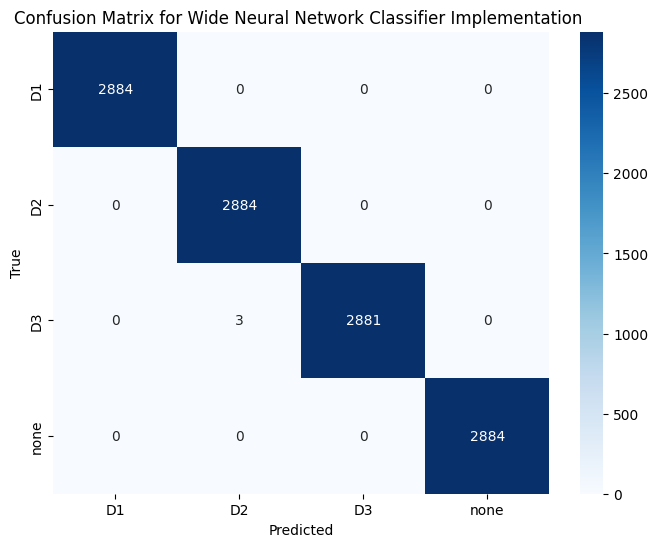

c:\Users\Naiema\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


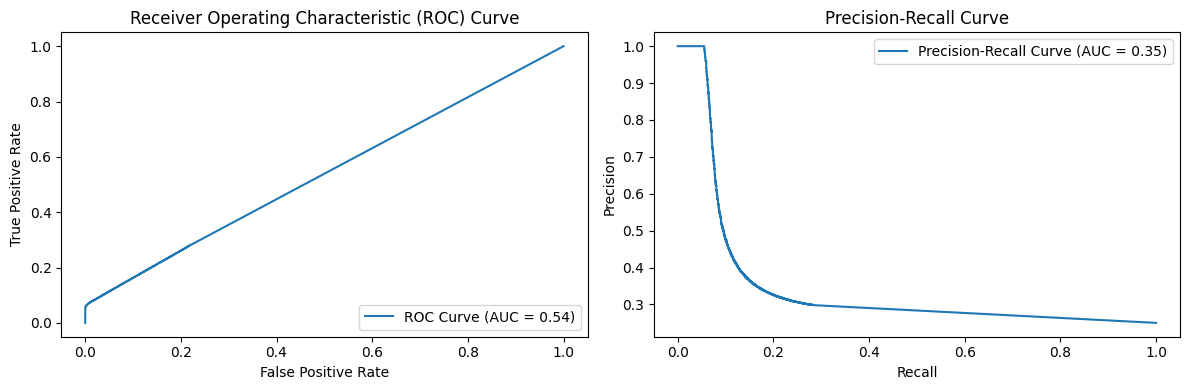

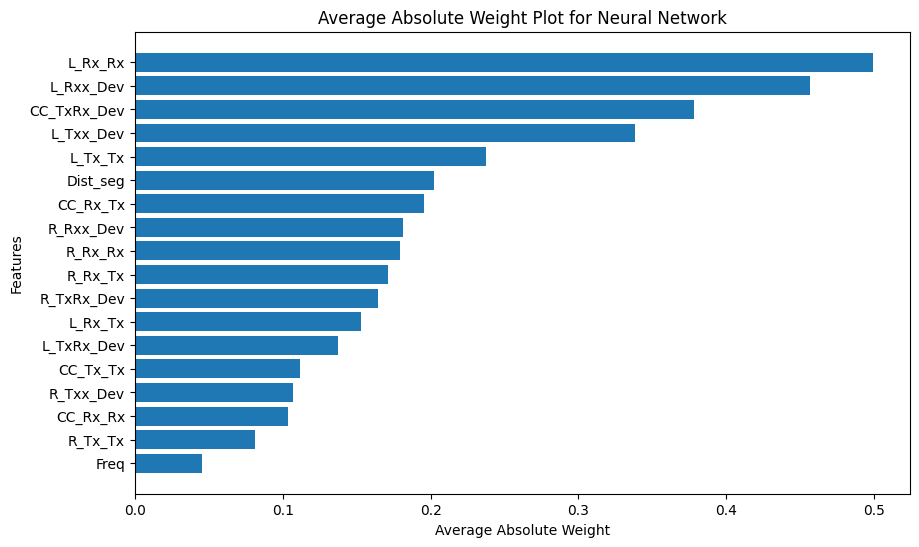

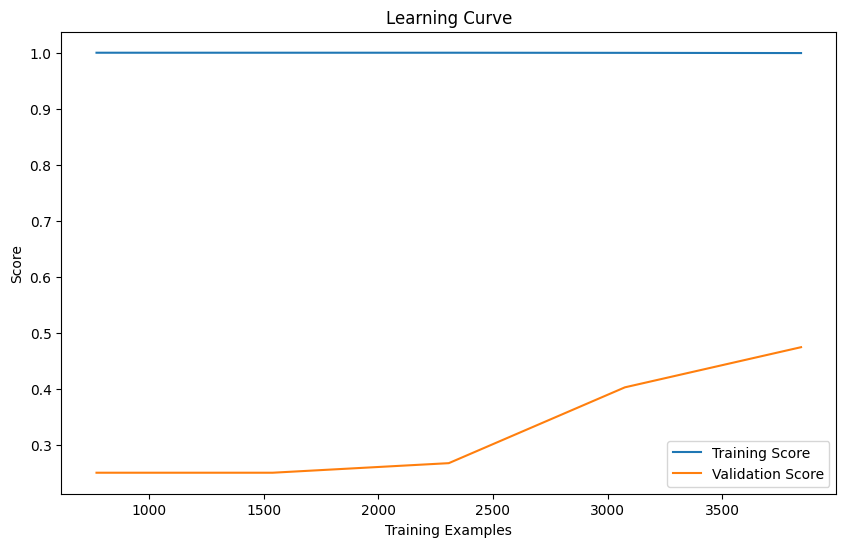

Validation Accuracy: 0.999739921976593


In [3]:
from sklearn.metrics import confusion_matrix  # Add this import statement
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

# Import data from CSV 
file_path = 'alldata.csv'
training_data = pd.read_csv(file_path)

# Global variables
global predictors_nn, response_nn , predictor_names_nn

# Function to train the classifier
def train_classifier(training_data):

    global predictors_nn, response_nn, predictor_names_nn

    # Extract predictors and response
   
    predictor_names_nn = ['Freq', 'Dist_seg', 'CC_Tx_Tx', 'CC_Rx_Tx', 'CC_Rx_Rx', 'L_Tx_Tx', 'L_Rx_Tx', 'L_Rx_Rx', 'R_Tx_Tx', 'R_Rx_Tx', 'R_Rx_Rx', 'CC_TxRx_Dev', 'L_Txx_Dev', 'L_TxRx_Dev', 'L_Rxx_Dev', 'R_Txx_Dev', 'R_TxRx_Dev', 'R_Rxx_Dev']
    predictors_nn = training_data[predictor_names_nn]
    response_nn = training_data['DeformationType']
    class_names = ['D1', 'D2', 'D3', 'none']

    # Standardize predictors
    scaler = StandardScaler()
    predictors_standardized = scaler.fit_transform(predictors_nn)

    # Train a classifier
    neural_network_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', alpha=0, max_iter=1000)
    neural_network_classifier.fit(predictors_standardized, response_nn)

    # Perform cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    validation_predictions = cross_val_predict(neural_network_classifier, predictors_standardized, response_nn, cv=kf)
    validation_accuracy = cross_val_score(neural_network_classifier, predictors_standardized, response_nn, cv=kf, scoring='accuracy').mean()

    # Compute confusion matrix
    cm = confusion_matrix(response_nn, validation_predictions, labels=class_names)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix for Wide Neural Network Classifier Implementation ')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Return the classifier object and its predict_proba function
    return {
        'predictFcn': lambda x: neural_network_classifier.predict(x),
        'predictProbaFcn': lambda x: neural_network_classifier.predict_proba(x),
        'RequiredVariables': predictor_names_nn,
        'ClassificationNeuralNetwork': neural_network_classifier,
        'About': 'This struct is a trained model exported from Classification Learner R2023a.',
        'HowToPredict': 'To make predictions on a new table, T, use:\n[yfit, scores] = c.predictFcn(T)\nreplacing \'c\' with the name of the variable that is this struct, e.g., \'trainedModel\'.\nThe table, T, must contain the variables returned by:\nc.RequiredVariables\nVariable formats (e.g., matrix/vector, datatype) must match the original training data.\nAdditional variables are ignored.\nFor more information, see <a href="matlab:helpview(fullfile(docroot, ''stats'', ''stats.map''), ''appclassification_exportmodeltoworkspace'')">How to predict using an exported model</a>.',
    }, validation_accuracy

# Function to plot ROC and Precision-Recall curves
def plot_roc_and_pr_curves(classifier, predictors, response, predict_proba_function=None):

    if predict_proba_function is None:
        probs = classifier.predict_proba(predictors)[:, 1]
    else:
        probs = predict_proba_function(predictors)[:, 1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(response == 'D1', probs, pos_label=True)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(response == 'D1', probs, pos_label=True)
    pr_auc = auc(recall, precision)

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

def plot_feature_importance(classifier, feature_names):
    # Check if the classifier is a neural network
    if 'ClassificationNeuralNetwork' in classifier and isinstance(classifier['ClassificationNeuralNetwork'], MLPClassifier):
        # Get the coefficients (weights) from the neural network
        coefficients = classifier['ClassificationNeuralNetwork'].coefs_

        # Calculate the average absolute weight for each feature
        avg_weights = np.mean(np.abs(coefficients[0]), axis=1)

        # Sort the features based on their average weights
        sorted_idx = avg_weights.argsort()

        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_idx)), avg_weights[sorted_idx])
        plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
        plt.xlabel('Average Absolute Weight')
        plt.ylabel('Features')
        plt.title('Average Absolute Weight Plot for Neural Network')
        plt.show()
    else:
        print("Feature importances not available for the given classifier.")
    
# Function to plot learning curve
# Function to plot learning curve
def plot_learning_curve(classifier, predictors, response):
    train_sizes, train_scores, test_scores = learning_curve(
        classifier['ClassificationNeuralNetwork'],  # Pass the classifier here
        predictors, response, cv=3, scoring='accuracy', n_jobs=1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5]
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc="best")
    plt.show()
    
trained_classifier, validation_accuracy = train_classifier(training_data)
plot_roc_and_pr_curves(trained_classifier, predictors_nn, response_nn, predict_proba_function=trained_classifier['predictProbaFcn'])
plot_feature_importance(trained_classifier, predictor_names_nn) 
plot_learning_curve(trained_classifier, predictors_nn, response_nn)
print("Validation Accuracy:", validation_accuracy)

Cubic SVM Classifier Implementation

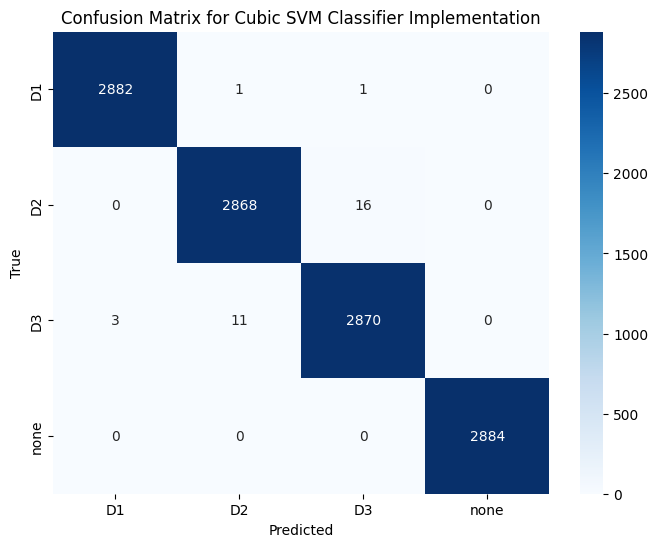

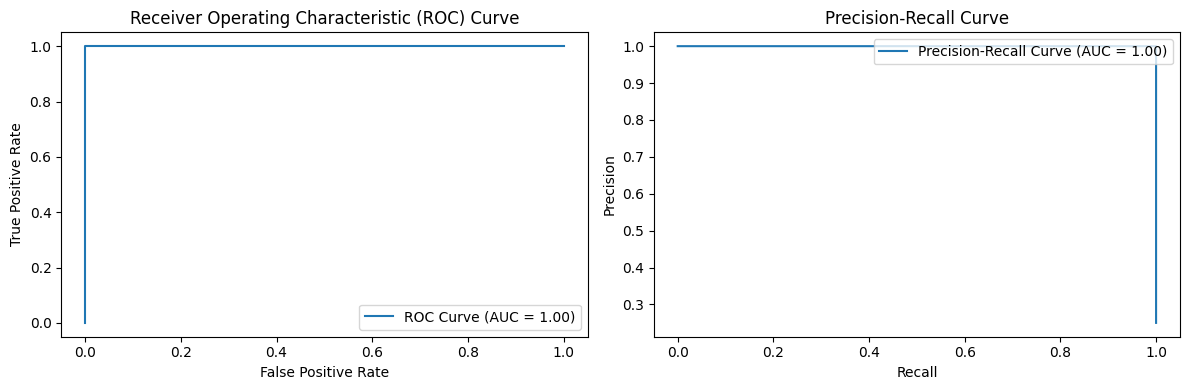

Feature importances not available for the given classifier.


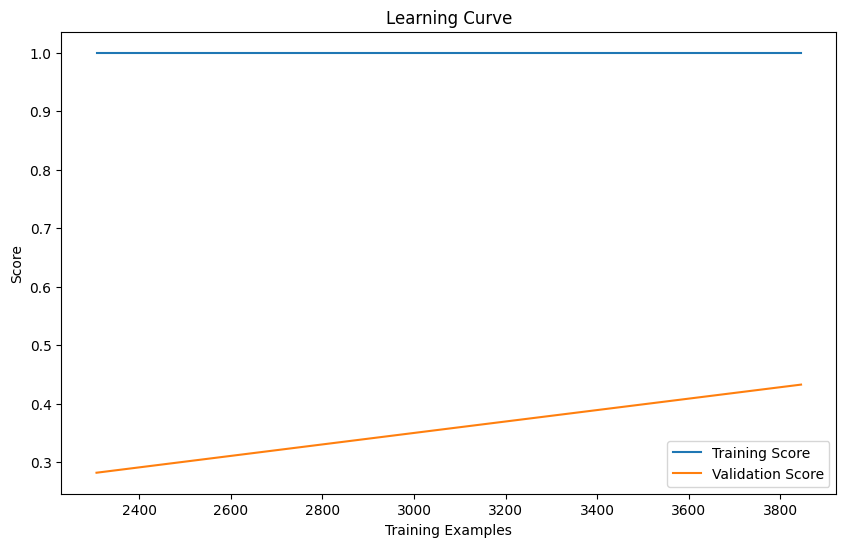

Validation Accuracy: 0.9972259846642612


In [4]:
from sklearn.metrics import confusion_matrix  # Add this import statement
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.model_selection import learning_curve
import numpy as np


file_path = 'alldata.csv'
training_data = pd.read_csv(file_path)

global predictors_svm, predictor_names_svm, response_svm

# Function to train the classifier
def train_classifier(training_data):

    global predictors_svm, predictor_names_svm, response_svm
    # Extract predictors and response
    predictor_names_svm = ['Freq', 'Dist_seg', 'CC_Tx_Tx', 'CC_Rx_Tx', 'CC_Rx_Rx', 'L_Tx_Tx', 'L_Rx_Tx', 'L_Rx_Rx', 'R_Tx_Tx', 'R_Rx_Tx', 'R_Rx_Rx', 'CC_TxRx_Dev', 'L_Txx_Dev', 'L_TxRx_Dev', 'L_Rxx_Dev', 'R_Txx_Dev', 'R_TxRx_Dev', 'R_Rxx_Dev']
    predictors_svm = training_data[predictor_names]
    response_svm = training_data['DeformationType']
    class_names = ['D1', 'D2', 'D3', 'none']

    # Train a classifier
    svm_classifier = SVC(kernel='poly', degree=3, gamma='auto', C=1)

    # Fit the classifier with training data
    svm_classifier.fit(predictors_svm, response_svm)

   # Perform cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    validation_predictions = cross_val_predict(svm_classifier, predictors_svm, response_svm, cv=kf)
    validation_accuracy = cross_val_score(svm_classifier, predictors_svm, response_svm, cv=kf, scoring='accuracy').mean()
    
    # Compute confusion matrix
    cm = confusion_matrix(response_svm, validation_predictions, labels=class_names)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix for Cubic SVM Classifier Implementation')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Create the result struct with predict function
    trained_classifier = {
        'predictFcn': lambda x: svm_classifier.predict(x),
        'RequiredVariables': predictor_names_svm,
        'ClassificationSVM': svm_classifier,
        'About': 'This struct is a trained model exported from Classification Learner R2023a.',
        'HowToPredict': 'To make predictions on a new table, T, use:\n[yfit, scores] = c.predictFcn(T)\nreplacing \'c\' with the name of the variable that is this struct, e.g., \'trainedModel\'.\nThe table, T, must contain the variables returned by:\nc.RequiredVariables\nVariable formats (e.g., matrix/vector, datatype) must match the original training data.\nAdditional variables are ignored.\nFor more information, see <a href="matlab:helpview(fullfile(docroot, ''stats'', ''stats.map''), ''appclassification_exportmodeltoworkspace'')">How to predict using an exported model</a>.',
    }
    return trained_classifier, validation_accuracy

# Function to plot ROC and Precision-Recall curves
def plot_roc_and_pr_curves(classifier, predictors, response):
    if 'ClassificationSVM' in classifier and isinstance(classifier['ClassificationSVM'], SVC):
        # SVM classifier
        probs = classifier['ClassificationSVM'].decision_function(predictors)
    elif 'ClassificationNeuralNetwork' in classifier and isinstance(classifier['ClassificationNeuralNetwork'], MLPClassifier):
        # Neural network classifier
        probs = classifier['ClassificationNeuralNetwork'].predict_proba(predictors)[:, 1]
    else:
        raise ValueError("Invalid or unsupported classifier type")

    # Convert response to a 1D array
    response = response.iloc[:, 0].values if isinstance(response, pd.DataFrame) else response

    # Select only the necessary columns for the ROC curve calculation
    response_binary = (response == 'D1').astype(int)

    # Extract probabilities for the positive class
    probs_positive_class = probs[:, 0] if isinstance(classifier['ClassificationSVM'], SVC) else probs

    # ROC Curve
    fpr, tpr, _ = roc_curve(response_binary, probs_positive_class, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(response_binary, probs_positive_class, pos_label=1)
    pr_auc = auc(recall, precision)

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    plt.tight_layout()
    plt.show()


def plot_feature_importance(classifier, feature_names):
    # Check if the classifier is a neural network
    if 'ClassificationNeuralNetwork' in classifier and isinstance(classifier['ClassificationNeuralNetwork'], MLPClassifier):
        # Get the coefficients (weights) from the neural network
        coefficients = classifier['ClassificationNeuralNetwork'].coefs_

        # Calculate the average absolute weight for each feature
        avg_weights = np.mean(np.abs(coefficients[0]), axis=1)

        # Sort the features based on their average weights
        sorted_idx = avg_weights.argsort()

        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_idx)), avg_weights[sorted_idx])
        plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
        plt.xlabel('Average Absolute Weight')
        plt.ylabel('Features')
        plt.title('Average Absolute Weight Plot for Neural Network')
        plt.show()
    else:
        print("Feature importances not available for the given classifier.")
    
# Function to plot learning curve
def plot_learning_curve(classifier, predictors, response):
    if 'ClassificationSVM' in classifier and isinstance(classifier['ClassificationSVM'], SVC):
        # SVM classifier
        classifier_instance = classifier['ClassificationSVM']
    else:
        print("Learning curve not available for the given classifier.")
        return

    train_sizes, train_scores, test_scores = learning_curve(
        classifier_instance, predictors, response, cv=3, scoring='accuracy', n_jobs=1,
        train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5]
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc="best")
    plt.show()
    
trained_classifier, validation_accuracy = train_classifier(training_data)
plot_roc_and_pr_curves(trained_classifier, predictors_svm, response_svm)
plot_feature_importance(trained_classifier, predictor_names_svm)
plot_learning_curve(trained_classifier, predictors_svm, response_svm)
print("Validation Accuracy:", validation_accuracy)

Fine Decision Tree Classifier Implementation

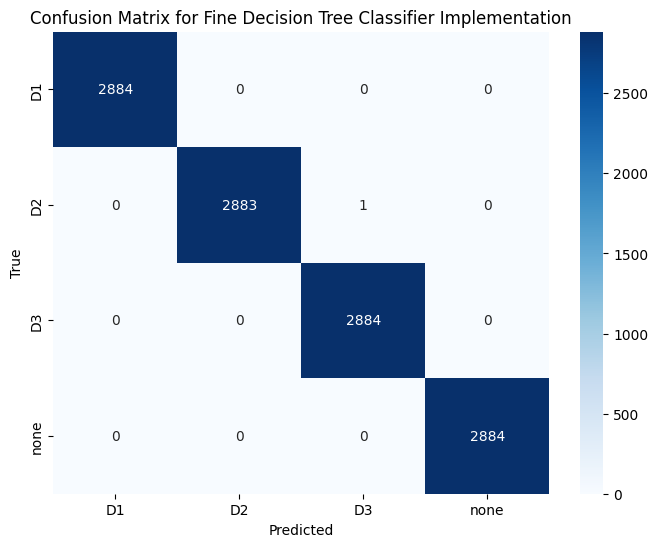

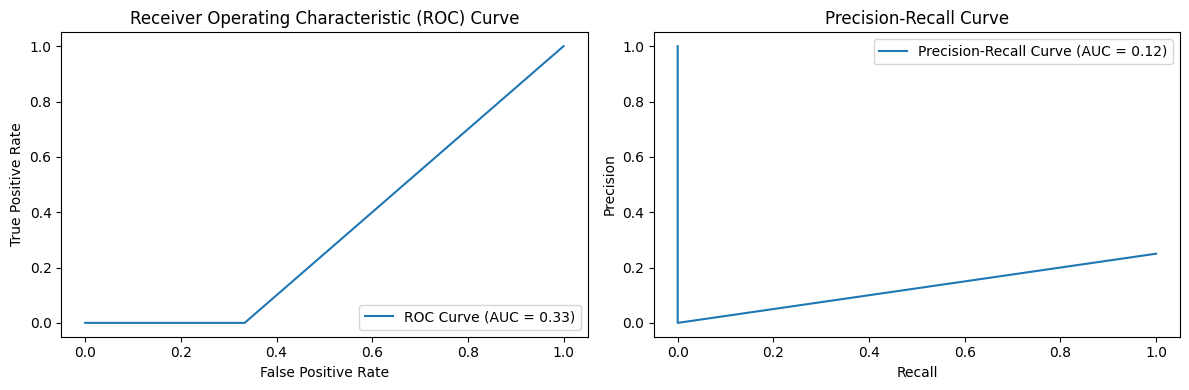

Feature importances not available for the given classifier.


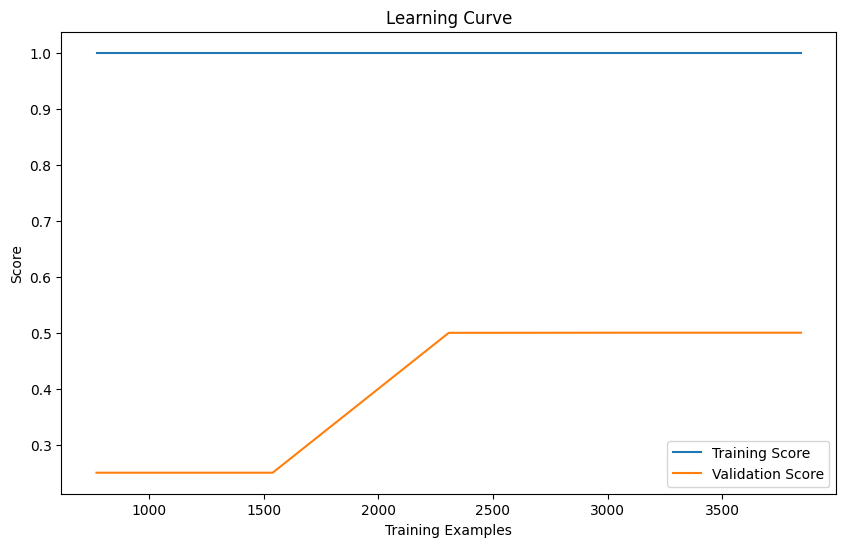

Validation Accuracy: 0.999913307325531


In [ ]:
from sklearn.metrics import confusion_matrix  # Add this import statement
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.model_selection import learning_curve
import numpy as np


file_path = 'alldata.csv'
training_data = pd.read_csv(file_path)

global response_fdt, predictor_names_fdt, predictors_fdt

# Function to train the classifier
def train_classifier(training_data):
    global response_fdt, predictor_names_fdt, predictors_fdt
    # Extract predictors and response
    predictor_names_fdt = ['Freq', 'Dist_seg', 'CC_Tx_Tx', 'CC_Rx_Tx', 'CC_Rx_Rx', 'L_Tx_Tx', 'L_Rx_Tx', 'L_Rx_Rx', 'R_Tx_Tx', 'R_Rx_Tx', 'R_Rx_Rx', 'CC_TxRx_Dev', 'L_Txx_Dev', 'L_TxRx_Dev', 'L_Rxx_Dev', 'R_Txx_Dev', 'R_TxRx_Dev', 'R_Rxx_Dev']
    predictors_fdt = training_data[predictor_names]
    response_fdt = training_data['DeformationType']
    class_names = ['D1', 'D2', 'D3', 'none']

    # Train a classifier
    decision_tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=100, random_state=0)

    # Fit the classifier with training data
    decision_tree_classifier.fit(predictors_fdt, response_fdt)

    # Perform cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    validation_predictions = cross_val_predict(decision_tree_classifier, predictors_fdt, response_fdt, cv=kf)
    validation_accuracy = cross_val_score(decision_tree_classifier, predictors_fdt, response_fdt, cv=kf, scoring='accuracy').mean()

    # Compute confusion matrix
    cm = confusion_matrix(response_fdt, validation_predictions, labels=class_names)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix for Fine Decision Tree Classifier Implementation')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Include the trained classifier in the result struct
    trained_classifier = {
        'predictFcn': lambda x: decision_tree_classifier.predict(x),
        'predict_proba': lambda x: decision_tree_classifier.predict_proba(x),
        'RequiredVariables': predictor_names_fdt,
        'ClassificationTree': decision_tree_classifier,
        'About': 'This struct is a trained model exported from Classification Learner R2023a.',
        'HowToPredict': 'To make predictions on a new table, T, use:\n[yfit, scores] = c.predictFcn(T)\nreplacing \'c\' with the name of the variable that is this struct, e.g., \'trainedModel\'.\nThe table, T, must contain the variables returned by:\nc.RequiredVariables\nVariable formats (e.g., matrix/vector, datatype) must match the original training data.\nAdditional variables are ignored.\nFor more information, see <a href="matlab:helpview(fullfile(docroot, ''stats'', ''stats.map''), ''appclassification_exportmodeltoworkspace'')">How to predict using an exported model</a>.',
    }

    return trained_classifier, validation_accuracy


# Function to plot ROC and Precision-Recall curves
def plot_roc_and_pr_curves(classifier, predictors, response):
    if 'ClassificationTree' in classifier and isinstance(classifier['ClassificationTree'], DecisionTreeClassifier):
        # Decision Tree classifier
        predict_proba_function = lambda x: classifier['ClassificationTree'].predict_proba(x)
    elif 'ClassificationNeuralNetwork' in classifier and isinstance(classifier['ClassificationNeuralNetwork'], MLPClassifier):
        # Neural network classifier
        predict_proba_function = lambda x: classifier['ClassificationNeuralNetwork'].predict_proba(x)
    else:
        raise ValueError("Invalid or unsupported classifier type")

    # ROC Curve
    fpr, tpr, _ = roc_curve(response == 'D1', predict_proba_function(predictors)[:, 1], pos_label=True)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(response == 'D1', predict_proba_function(predictors)[:, 1], pos_label=True)
    pr_auc = auc(recall, precision)

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

def plot_feature_importance(classifier, feature_names):
    # Check if the classifier is a neural network
    if 'ClassificationNeuralNetwork' in classifier and isinstance(classifier['ClassificationNeuralNetwork'], MLPClassifier):
        # Get the coefficients (weights) from the neural network
        coefficients = classifier['ClassificationNeuralNetwork'].coefs_

        # Calculate the average absolute weight for each feature
        avg_weights = np.mean(np.abs(coefficients[0]), axis=1)

        # Sort the features based on their average weights
        sorted_idx = avg_weights.argsort()

        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_idx)), avg_weights[sorted_idx])
        plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
        plt.xlabel('Average Absolute Weight')
        plt.ylabel('Features')
        plt.title('Average Absolute Weight Plot for Neural Network')
        plt.show()
    else:
        print("Feature importances not available for the given classifier.")
    
# Function to plot learning curve
def plot_learning_curve(classifier, predictors, response):
    if 'ClassificationTree' in classifier and isinstance(classifier['ClassificationTree'], DecisionTreeClassifier):
        # Decision Tree classifier
        clf = classifier['ClassificationTree']
    elif 'ClassificationNeuralNetwork' in classifier and isinstance(classifier['ClassificationNeuralNetwork'], MLPClassifier):
        # Neural network classifier
        clf = classifier['ClassificationNeuralNetwork']
    else:
        raise ValueError("Invalid or unsupported classifier type")

    train_sizes, train_scores, test_scores = learning_curve(
        clf, predictors, response, cv=3, scoring='accuracy', n_jobs=1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5]
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc="best")
    plt.show()
    

trained_classifier, validation_accuracy = train_classifier(training_data)
plot_roc_and_pr_curves(trained_classifier, predictors_fdt, response_fdt)
plot_feature_importance(trained_classifier, predictor_names_fdt)
plot_learning_curve(trained_classifier, predictors_fdt, response_fdt)
print("Validation Accuracy:", validation_accuracy)

Bilayered Neural Network Classifier Implementation

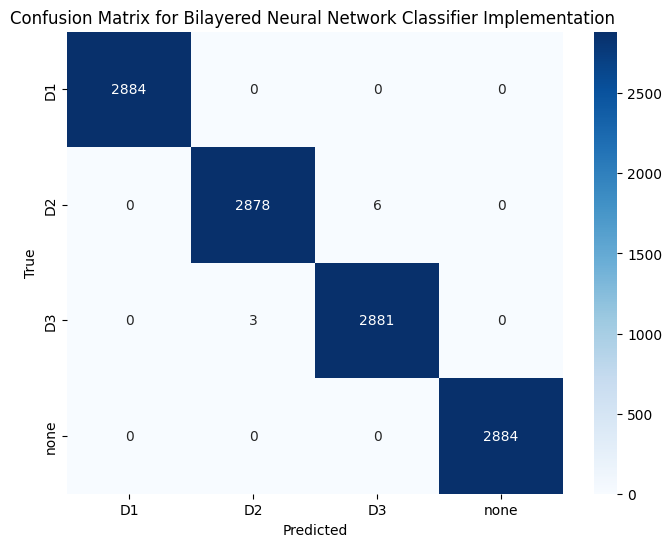

c:\Users\Naiema\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


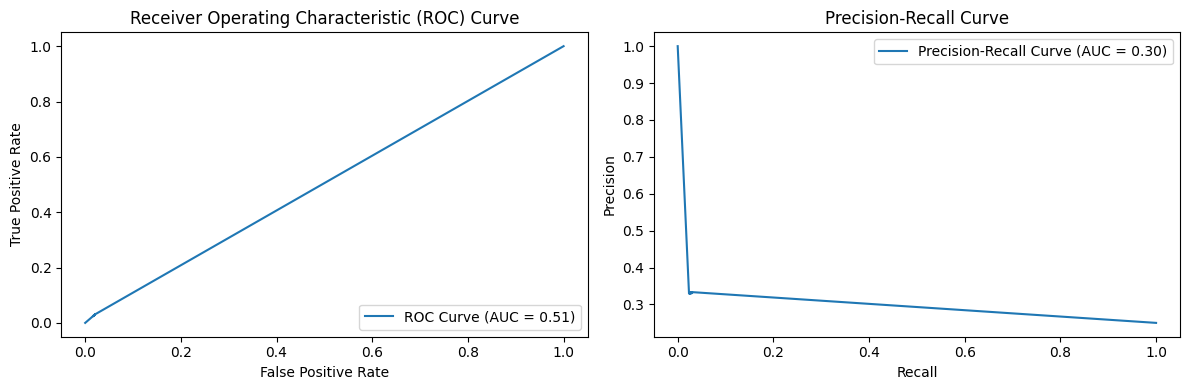

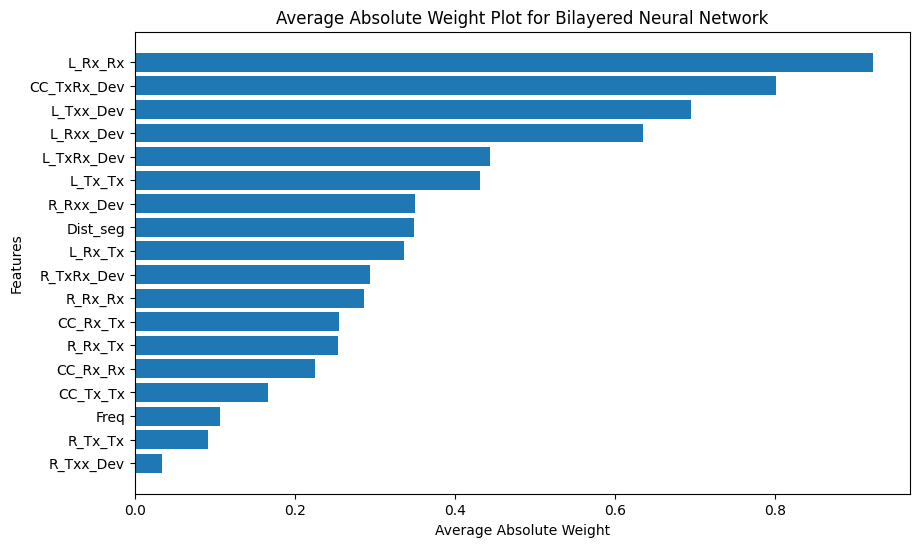

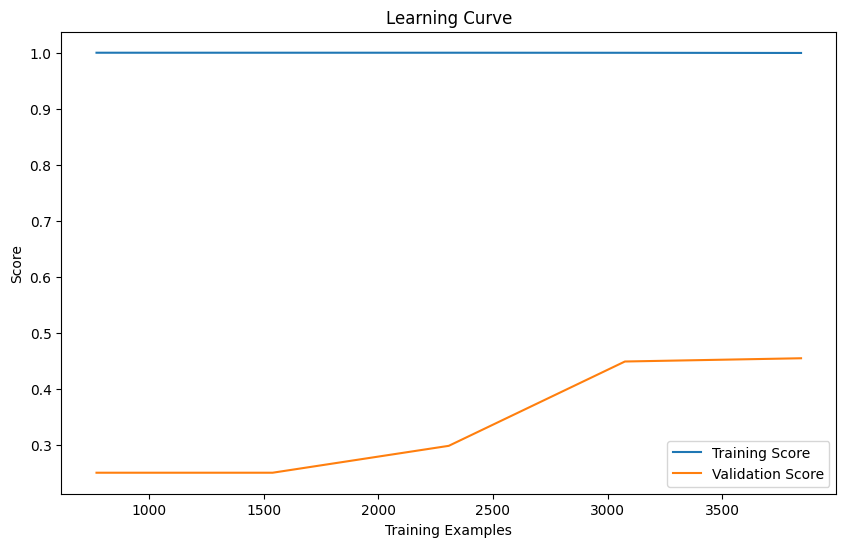

Validation Accuracy: 0.9994798439531859


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Import data from CSV
file_path = 'alldata.csv'
training_data = pd.read_csv(file_path)

# Global variables
predictors_bnn, response_bnn, predictor_names_bnn = None, None, None

# Function to train the classifier
def train_classifier(training_data):
    global predictors_bnn, response_bnn, predictor_names_bnn

    # Extract predictors and response
    predictor_names_bnn = ['Freq', 'Dist_seg', 'CC_Tx_Tx', 'CC_Rx_Tx', 'CC_Rx_Rx', 'L_Tx_Tx', 'L_Rx_Tx', 'L_Rx_Rx', 'R_Tx_Tx', 'R_Rx_Tx', 'R_Rx_Rx', 'CC_TxRx_Dev', 'L_Txx_Dev', 'L_TxRx_Dev', 'L_Rxx_Dev', 'R_Txx_Dev', 'R_TxRx_Dev', 'R_Rxx_Dev']
    predictors_bnn = training_data[predictor_names_bnn]
    response_bnn = training_data['DeformationType']
    class_names = ['D1', 'D2', 'D3', 'none']

    # Standardize predictors
    scaler = StandardScaler()
    predictors_standardized = scaler.fit_transform(predictors_bnn)

    # Train a classifier
    neural_network_classifier = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', alpha=0, max_iter=1000)
    neural_network_classifier.fit(predictors_standardized, response_bnn)

    # Perform cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    validation_predictions = cross_val_predict(neural_network_classifier, predictors_standardized, response_bnn, cv=kf)
    validation_accuracy = cross_val_score(neural_network_classifier, predictors_standardized, response_bnn, cv=kf, scoring='accuracy').mean()

    # Compute confusion matrix
    cm = confusion_matrix(response_bnn, validation_predictions, labels=class_names)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix for Bilayered Neural Network Classifier Implementation ')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Return the classifier object and its predict_proba function
    return {
        'predictFcn': lambda x: neural_network_classifier.predict(x),
        'predictProbaFcn': lambda x: neural_network_classifier.predict_proba(x),
        'RequiredVariables': predictor_names_bnn,
        'ClassificationNeuralNetwork': neural_network_classifier,
        'About': 'This struct is a trained model exported from Classification Learner R2023a.',
        'HowToPredict': 'To make predictions on a new table, T, use:\n[yfit, scores] = c.predictFcn(T)\nreplacing \'c\' with the name of the variable that is this struct, e.g., \'trainedModel\'.\nThe table, T, must contain the variables returned by:\nc.RequiredVariables\nVariable formats (e.g., matrix/vector, datatype) must match the original training data.\nAdditional variables are ignored.\nFor more information, see <a href="matlab:helpview(fullfile(docroot, ''stats'', ''stats.map''), ''appclassification_exportmodeltoworkspace'')">How to predict using an exported model</a>.',
    }, validation_accuracy

# Function to plot ROC and Precision-Recall curves
def plot_roc_and_pr_curves(classifier, predictors, response, predict_proba_function=None):
    if predict_proba_function is None:
        probs = classifier['predictProbaFcn'](predictors)[:, 1]
    else:
        probs = predict_proba_function(predictors)[:, 1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(response == 'D1', probs, pos_label=True)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(response == 'D1', probs, pos_label=True)
    pr_auc = auc(recall, precision)

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

# Function to plot feature importance
def plot_feature_importance(classifier, feature_names):
    if 'ClassificationNeuralNetwork' in classifier and isinstance(classifier['ClassificationNeuralNetwork'], MLPClassifier):
        # Get the coefficients (weights) from the neural network
        coefficients = classifier['ClassificationNeuralNetwork'].coefs_

        # Calculate the average absolute weight for each feature
        avg_weights = np.mean(np.abs(coefficients[0]), axis=1)

        # Sort the features based on their average weights
        sorted_idx = avg_weights.argsort()

        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_idx)), avg_weights[sorted_idx])
        plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
        plt.xlabel('Average Absolute Weight')
        plt.ylabel('Features')
        plt.title('Average Absolute Weight Plot for Bilayered Neural Network')
        plt.show()
    else:
        print("Feature importances not available for the given classifier.")

# Function to plot learning curve
def plot_learning_curve(classifier, predictors, response):
    train_sizes, train_scores, test_scores = learning_curve(
        classifier['ClassificationNeuralNetwork'],  # Pass the classifier here
        predictors, response, cv=3, scoring='accuracy', n_jobs=1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5]
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc="best")
    plt.show()

trained_classifier, validation_accuracy = train_classifier(training_data)
plot_roc_and_pr_curves(trained_classifier, predictors_bnn, response_bnn, predict_proba_function=trained_classifier['predictProbaFcn'])
plot_feature_importance(trained_classifier, predictor_names_bnn)
plot_learning_curve(trained_classifier, predictors_bnn, response_bnn)
print("Validation Accuracy:", validation_accuracy)
